### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



<ipython-input-4-dcb64a7d903e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=facturacion, x="Tienda", y="Ingreso", palette="viridis")


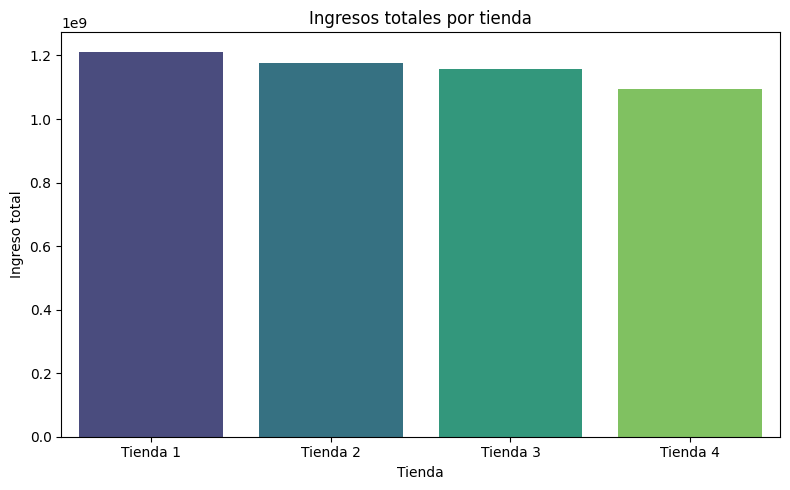

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna de ingreso (Precio + Costo de envío)
df_total["Ingreso"] = df_total["Precio"] + df_total["Costo de envío"]

# Agrupar por tienda y sumar los ingresos
facturacion = df_total.groupby("Tienda")["Ingreso"].sum().reset_index()

# Visualizar con gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=facturacion, x="Tienda", y="Ingreso", palette="viridis")
plt.title("Ingresos totales por tienda")
plt.ylabel("Ingreso total")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

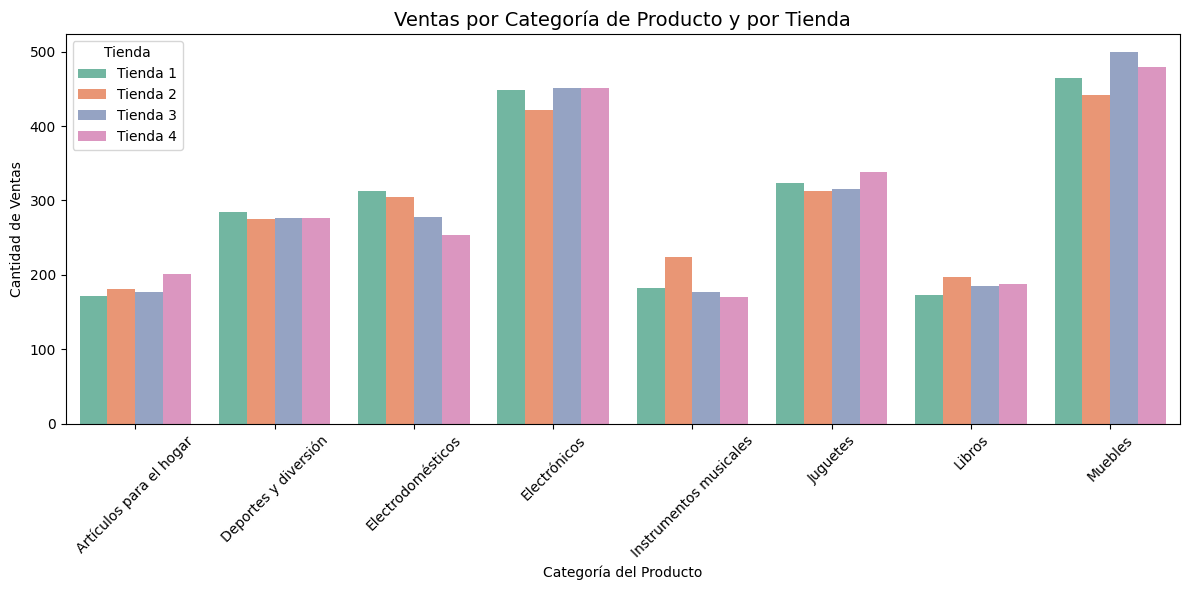

In [3]:
# Paso 1: Contar las ventas por categoría y tienda
ventas_categoria = df_total.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad de Ventas")

# Paso 2: Visualización con gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ventas_categoria,
    x="Categoría del Producto",
    y="Cantidad de Ventas",
    hue="Tienda",
    palette="Set2"
)
plt.title("Ventas por Categoría de Producto y por Tienda", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de Ventas")
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


<ipython-input-5-fdd6229b9d17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


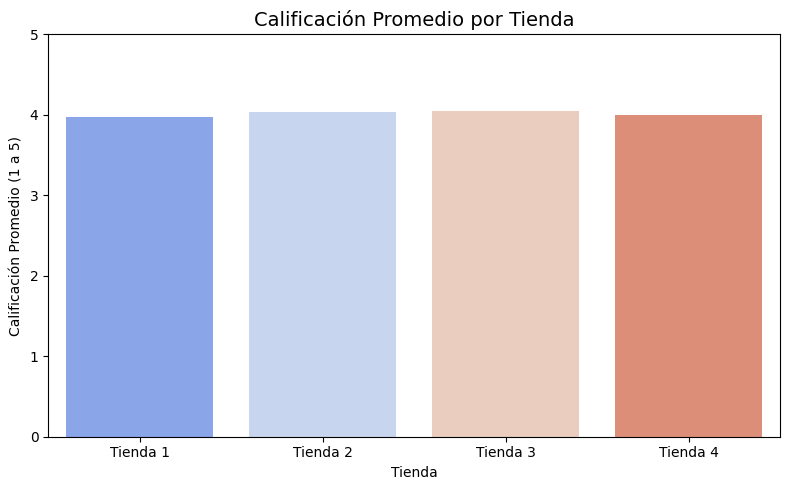

In [5]:
# Paso 1: Calcular calificación promedio por tienda
calificacion_promedio = df_total.groupby("Tienda")["Calificación"].mean().reset_index()

# Paso 2: Visualización
plt.figure(figsize=(8, 5))
sns.barplot(
    data=calificacion_promedio,
    x="Tienda",
    y="Calificación",
    palette="coolwarm"
)
plt.title("Calificación Promedio por Tienda", fontsize=14)
plt.ylabel("Calificación Promedio (1 a 5)")
plt.xlabel("Tienda")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

<ipython-input-6-add967734fef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


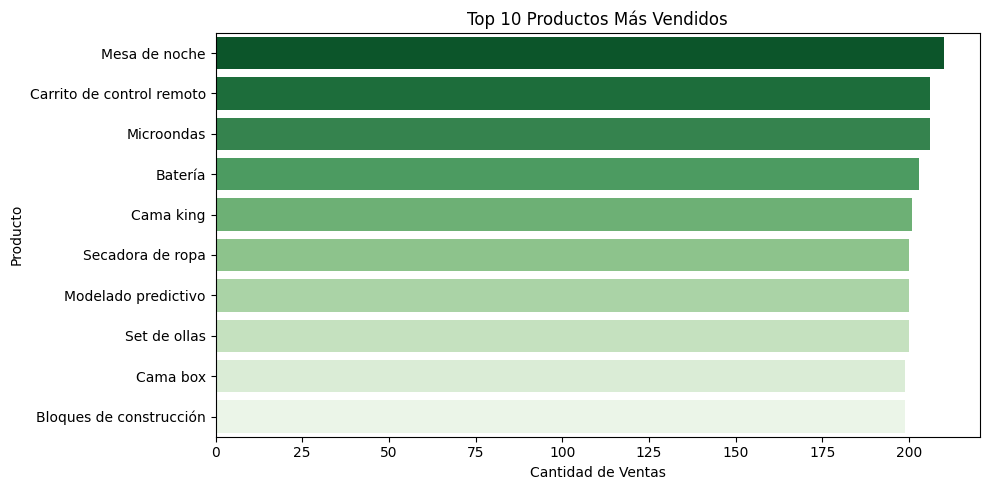

<ipython-input-6-add967734fef>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


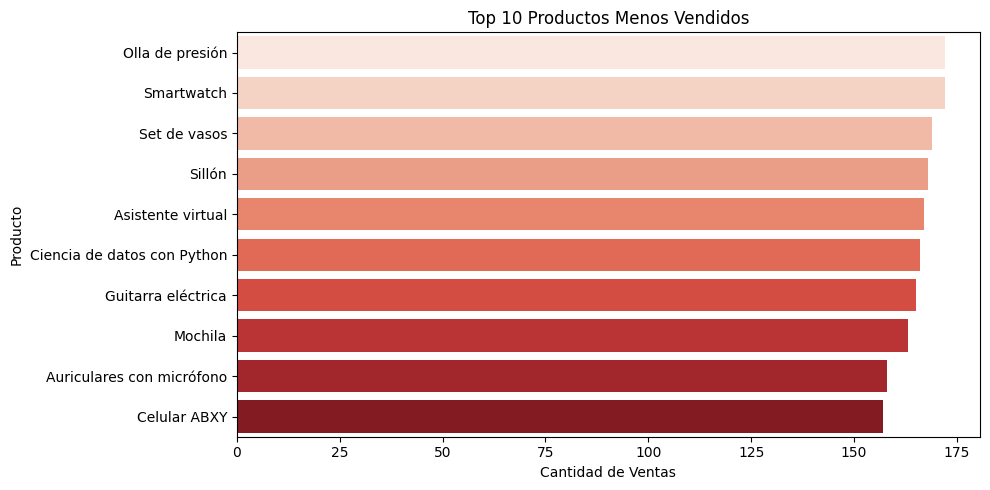

In [6]:
# Paso 1: Contar cuántas veces se vendió cada producto
ventas_productos = df_total["Producto"].value_counts().reset_index()
ventas_productos.columns = ["Producto", "Cantidad de Ventas"]

# Paso 2: Seleccionar top 10 productos más vendidos
top_10_mas_vendidos = ventas_productos.head(10)

# Paso 3: Seleccionar top 10 productos menos vendidos
top_10_menos_vendidos = ventas_productos.tail(10)

# Paso 4: Visualizar productos más vendidos
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_10_mas_vendidos,
    x="Cantidad de Ventas",
    y="Producto",
    palette="Greens_r"
)
plt.title("Top 10 Productos Más Vendidos")
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

# Paso 5: Visualizar productos menos vendidos
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_10_menos_vendidos,
    x="Cantidad de Ventas",
    y="Producto",
    palette="Reds"
)
plt.title("Top 10 Productos Menos Vendidos")
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

<ipython-input-7-da80cc818008>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


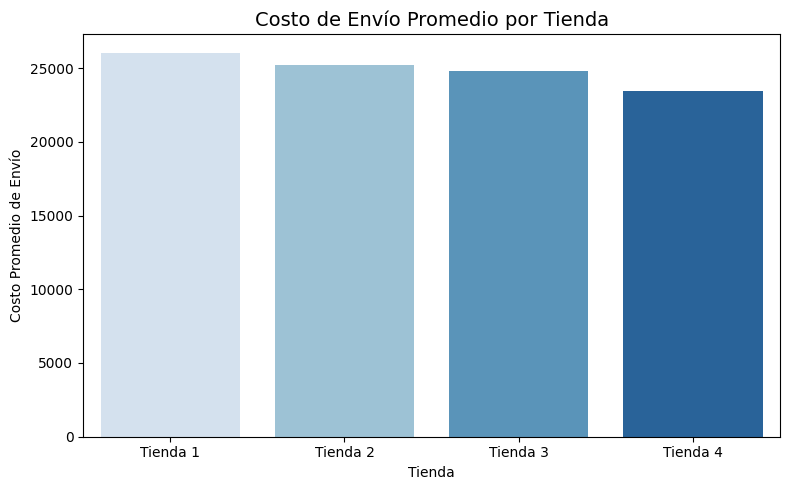

In [7]:
# Paso 1: Calcular costo de envío promedio por tienda
envio_promedio = df_total.groupby("Tienda")["Costo de envío"].mean().reset_index()

# Paso 2: Visualización
plt.figure(figsize=(8, 5))
sns.barplot(
    data=envio_promedio,
    x="Tienda",
    y="Costo de envío",
    palette="Blues"
)
plt.title("Costo de Envío Promedio por Tienda", fontsize=14)
plt.ylabel("Costo Promedio de Envío")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


INFORME FINAL

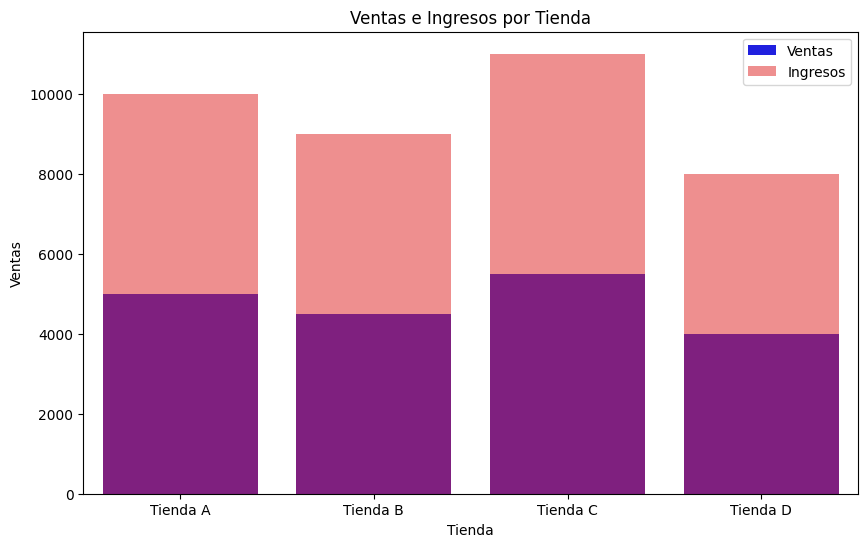

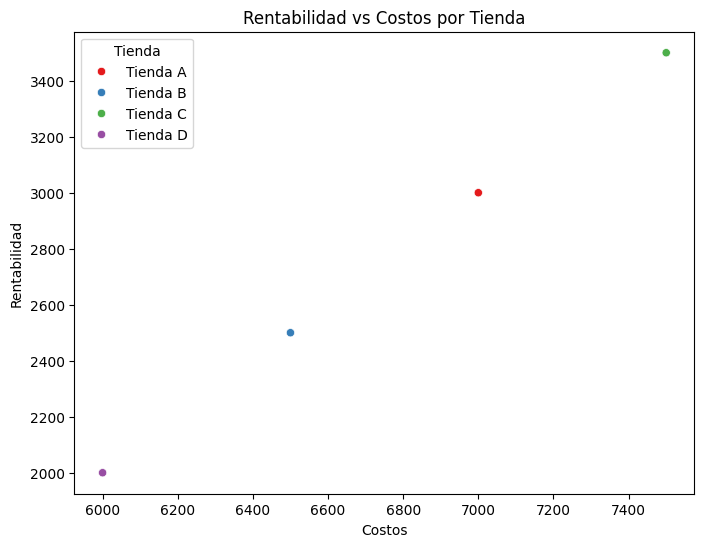

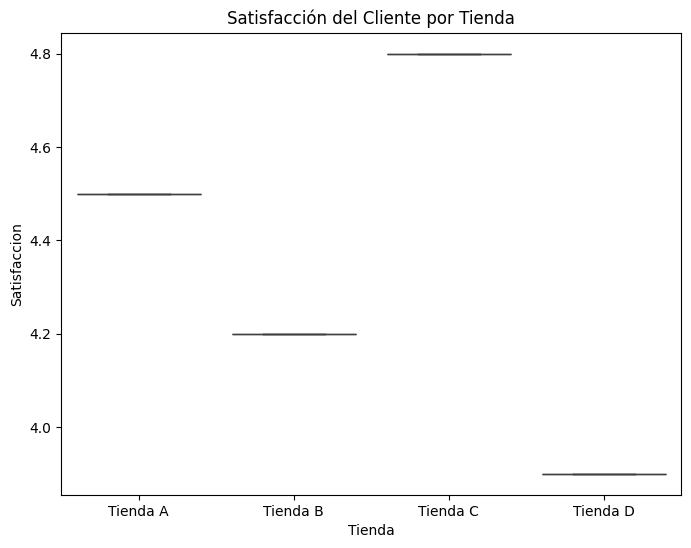

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos simulados para el ejemplo
tiendas = ['Tienda A', 'Tienda B', 'Tienda C', 'Tienda D']
ventas = [5000, 4500, 5500, 4000]
ingresos = [10000, 9000, 11000, 8000]
costos = [7000, 6500, 7500, 6000]
satisfaccion = [4.5, 4.2, 4.8, 3.9]

# Creación de un DataFrame
df = pd.DataFrame({
    'Tienda': tiendas,
    'Ventas': ventas,
    'Ingresos': ingresos,
    'Costos': costos,
    'Satisfaccion': satisfaccion
})

# Gráfico de barras de Ventas vs Ingresos
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Ventas', data=df, color='b', label='Ventas')
sns.barplot(x='Tienda', y='Ingresos', data=df, color='r', label='Ingresos', alpha=0.5)
plt.title('Ventas e Ingresos por Tienda')
plt.legend()
plt.show()

# Diagrama de dispersión de Rentabilidad vs Costos
df['Rentabilidad'] = df['Ingresos'] - df['Costos']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Costos', y='Rentabilidad', hue='Tienda', data=df, palette='Set1')
plt.title('Rentabilidad vs Costos por Tienda')
plt.show()

# Diagrama de caja de Satisfacción del Cliente
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tienda', y='Satisfaccion', data=df)
plt.title('Satisfacción del Cliente por Tienda')
plt.show()


MAPA INTERACTIVO

In [10]:
import folium
import pandas as pd

# Datos de ejemplo con latitudes, longitudes y ventas
data = {
    'Tienda': ['Tienda A', 'Tienda B', 'Tienda C', 'Tienda D'],
    'Latitud': [-12.046, -11.934, -12.063, -12.020],
    'Longitud': [-77.042, -77.062, -77.055, -77.038],
    'Ventas': [5000, 4500, 5500, 4000]
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Inicializamos el mapa centrado en una ubicación promedio
m = folium.Map(location=[df['Latitud'].mean(), df['Longitud'].mean()], zoom_start=13)

# Añadir marcadores en el mapa
for i in range(len(df)):
    folium.CircleMarker(
        location=[df.loc[i, 'Latitud'], df.loc[i, 'Longitud']],
        radius=10,
        color='blue' if df.loc[i, 'Ventas'] >= 5000 else 'red',  # Color según ventas
        fill=True,
        fill_color='blue' if df.loc[i, 'Ventas'] >= 5000 else 'red',
        fill_opacity=0.6,
        popup=f"{df.loc[i, 'Tienda']} - Ventas: {df.loc[i, 'Ventas']}"
    ).add_to(m)

# Mostrar el mapa interactivo
m.save("mapa_ventas.html")

MAPA DE CALOR

In [11]:
from folium.plugins import HeatMap

# Preparar los datos para el mapa de calor
ventas_lat_lon = df[['Latitud', 'Longitud', 'Ventas']].values

# Inicializamos el mapa centrado en una ubicación promedio
m = folium.Map(location=[df['Latitud'].mean(), df['Longitud'].mean()], zoom_start=13)

# Añadir el HeatMap al mapa
HeatMap(ventas_lat_lon).add_to(m)

# Mostrar el mapa de calor
m.save("heatmap_ventas.html")


GRÁFICO DE DISPERSIÓN

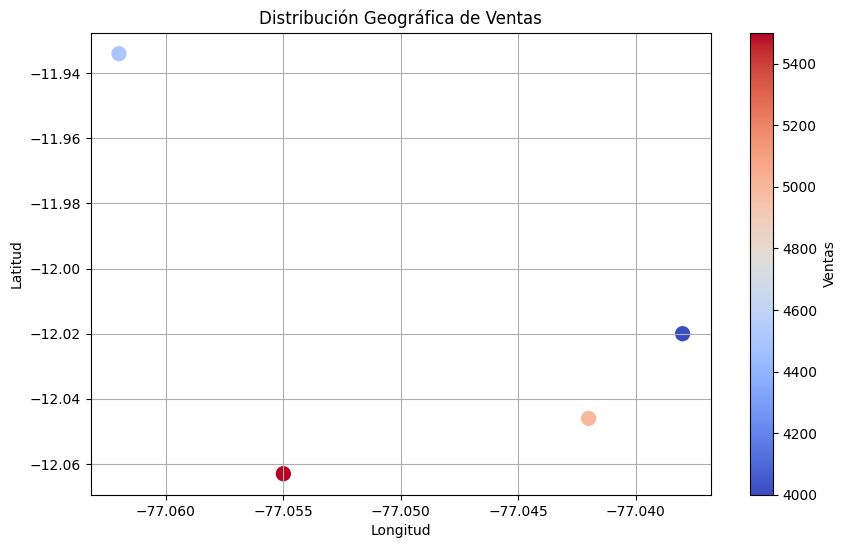

In [12]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitud'], df['Latitud'], c=df['Ventas'], cmap='coolwarm', s=100)
plt.colorbar(label='Ventas')
plt.title('Distribución Geográfica de Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()
